In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.restoration import denoise_wavelet

boxes = ['gearbox00', 'gearbox10', 'gearbox20', 'gearbox30', 'gearbox40']
sensors = ['sensor1', 'sensor2', 'sensor3', 'sensor4']

In [3]:
# 读取数据，储存在列表中。每个表为一个dataFrame

data = pd.read_excel('原始数据一张表.xlsx')

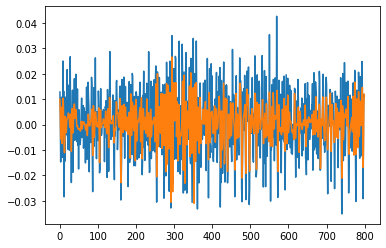

In [5]:
# 小波降噪实验数据
x_noisy = data.iloc[:800,1]
x_denoisy = denoise_wavelet(x_noisy, mode='soft', wavelet_levels=3, wavelet='sym8', rescale_sigma='True')

plt.plot(x_noisy)
plt.plot(x_denoisy)
plt.show()

In [17]:
# 保存小波降噪后的数据,wavelet_levels= 2 or 3

wavelet_levels = 3
writer = pd.ExcelWriter('降噪后数据,等级为{}.xlsx'.format(wavelet_levels))
count = 29400

for i in range(5):
    denoise_data = pd.DataFrame()
    for sen in sensors:
        temp = data[sen][count*i:count*(i+1)]
        temp = denoise_wavelet(temp, mode='soft', wavelet_levels=wavelet_levels, wavelet='sym8', rescale_sigma='True')
        temp = pd.DataFrame(temp,columns=[sen])
        denoise_data = pd.concat([denoise_data,temp],axis=1)
    denoise_data.to_excel(writer, sheet_name=boxes[i])

writer.save()

In [19]:
# 保存小波降噪后的数据(较少数据，存于一张表)

wavelet_levels = 3
writer = pd.ExcelWriter('40000组降噪后等级为{}.xlsx'.format(wavelet_levels))
count = 29400

denoisy_data = pd.DataFrame()
for i in range(5):
    denoise_data = pd.DataFrame()
    for sen in sensors:
        temp = data[sen][count*i:count*i+8000]
        temp = denoise_wavelet(temp, mode='soft', wavelet_levels=wavelet_levels, wavelet='sym8', rescale_sigma='True')
        temp = pd.DataFrame(temp,columns=[sen])
        denoise_data = pd.concat([denoise_data,temp],axis=1)
    denoise_data['target'] = i
    denoisy_data = pd.concat([denoisy_data,denoise_data], axis=0)
denoisy_data.to_excel(writer, sheet_name='sheet1')

writer.save()

In [ ]:
样本数